Title: Popular Classification Algorithms


Decision Trees


Task 1: Predict the loan default risk based on borrower characteristics.

Sample of the generated dataset:
   credit_score  annual_income_k  loan_amount_k  employment_years  \
0           402        92.410669      15.647778                19   
1           735        91.409893      27.505869                 7   
2           570        39.924842      21.959750                 7   
3           406        70.205928      23.169794                16   
4           371        56.837970      28.886628                19   

   debt_to_income_ratio  default  
0              0.527145        0  
1              0.259560        1  
2              0.349143        0  
3              0.356976        0  
4              0.319548        0  

Default distribution:
default
1    554
0    446
Name: count, dtype: int64
--------------------------------------------------
Training set size: 700 samples
Testing set size: 300 samples
--------------------------------------------------
Decision Tree Model Trained Successfully!
--------------------------------------------------
Sample Pred

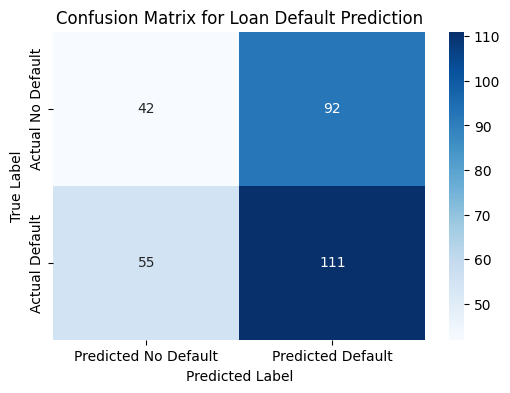

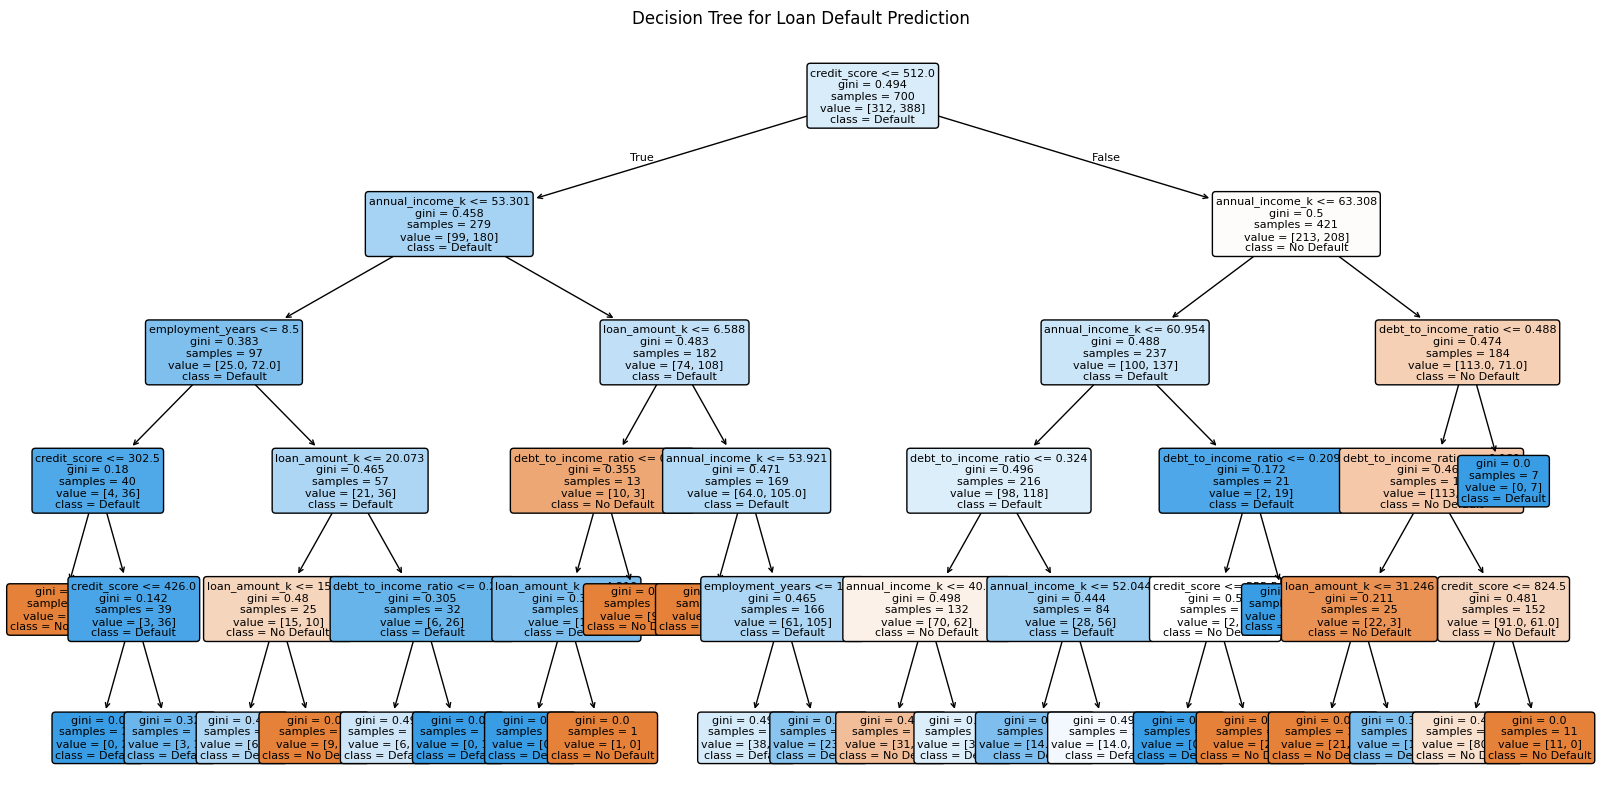

--------------------------------------------------

Predicting for new borrowers:
Borrower 1 (Credit Score: 720, Income: $80k, Loan: $15k, Employment Years: 10, DTI: 0.20):
  Predicted Status: No Default
  Probability of Default: 0.4326
Borrower 2 (Credit Score: 500, Income: $35k, Loan: $40k, Employment Years: 2, DTI: 0.45):
  Predicted Status: Default
  Probability of Default: 0.8000
Borrower 3 (Credit Score: 650, Income: $55k, Loan: $25k, Employment Years: 7, DTI: 0.30):
  Predicted Status: Default
  Probability of Default: 0.5465
--------------------------------------------------

--- Key Takeaways for Decision Trees ---
1. Decision Trees make decisions by splitting data based on feature values.
2. 'max_depth' is a crucial parameter to control tree complexity and prevent overfitting.
3. Visualizing the tree helps understand the decision rules the model has learned.
4. They are easy to interpret, which is a major advantage for explaining predictions (e.g., to a loan officer).
5. Howe

In [14]:
# Write your code here

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Generate Sample Data
# In a real scenario, you would load your data from a CSV, database, etc.
# Example: df = pd.read_csv('loan_data.csv')

np.random.seed(42) # for reproducibility

num_borrowers = 1000

# Features (borrower characteristics)
credit_score = np.random.randint(300, 850, size=num_borrowers)
annual_income_k = np.random.normal(loc=60, scale=20, size=num_borrowers) # in thousands
loan_amount_k = np.random.normal(loc=20, scale=10, size=num_borrowers) # in thousands
employment_years = np.random.randint(0, 20, size=num_borrowers)
debt_to_income_ratio = np.random.normal(loc=0.3, scale=0.1, size=num_borrowers)
# Ensure non-negative values for DTI
debt_to_income_ratio = np.clip(debt_to_income_ratio, 0.05, 0.6)


# Simulate loan default risk (target variable)
# A simplified logic: higher risk with low credit score, low income, high loan, less employment, high DTI
default_probability = (
    0.6  # Baseline default probability
    - (credit_score / 1000) * 0.4 # Higher credit score, lower risk
    - (annual_income_k / 200) * 0.2 # Higher income, lower risk
    + (loan_amount_k / 50) * 0.1 # Higher loan amount, higher risk
    - (employment_years / 30) * 0.1 # More employment years, lower risk
    + (debt_to_income_ratio * 0.8) # Higher DTI, higher risk
)

# Ensure probabilities are within [0, 1]
default_probability = np.clip(default_probability, 0.05, 0.95)

# Generate 'default' (1 for default, 0 for no default)
loan_default = (np.random.rand(num_borrowers) < default_probability).astype(int)

# Create a Pandas DataFrame
data = pd.DataFrame({
    'credit_score': credit_score,
    'annual_income_k': annual_income_k,
    'loan_amount_k': loan_amount_k,
    'employment_years': employment_years,
    'debt_to_income_ratio': debt_to_income_ratio,
    'default': loan_default
})

print("Sample of the generated dataset:")
print(data.head())
print("\nDefault distribution:")
print(data['default'].value_counts())
print("-" * 50)

# 2. Define Features (X) and Target (y)
X = data[['credit_score', 'annual_income_k', 'loan_amount_k', 'employment_years', 'debt_to_income_ratio']]
y = data['default']

# 3. Split Data into Training and Testing Sets
# Using stratify=y to ensure similar proportions of default/non-default in splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Training set size: {len(X_train)} samples")
print(f"Testing set size: {len(X_test)} samples")
print("-" * 50)

# 4. Train Decision Tree Model
# You can play with parameters like max_depth, min_samples_leaf, criterion
model = DecisionTreeClassifier(max_depth=5, random_state=42) # Limiting depth for better visualization and preventing overfitting
model.fit(X_train, y_train)

print("Decision Tree Model Trained Successfully!")
print("-" * 50)

# 5. Make Predictions on the Test Set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1] # Probability of default (class 1)

print("Sample Predictions on Test Set:")
results = pd.DataFrame({
    'Actual Default': y_test,
    'Predicted Default': y_pred,
    'Default Probability': y_pred_proba
})
print(results.head(10)) # Display first 10 predictions
print("-" * 50)

# 6. Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Model Accuracy on Test Set: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print("-" * 50)

# Visualize Confusion Matrix (optional but recommended for better understanding)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted No Default', 'Predicted Default'],
            yticklabels=['Actual No Default', 'Actual Default'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Loan Default Prediction')
plt.show()

# 7. Visualize the Decision Tree (Important for understanding how it makes decisions)
plt.figure(figsize=(20, 10)) # Adjust figure size for better visibility
plot_tree(model,
          feature_names=X.columns.tolist(),
          class_names=['No Default', 'Default'],
          filled=True,
          rounded=True,
          fontsize=8)
plt.title("Decision Tree for Loan Default Prediction")
plt.show()
print("-" * 50)

# 8. Predict for a New Borrower
new_borrower_data = pd.DataFrame({
    'credit_score': [720, 500, 650],
    'annual_income_k': [80, 35, 55],
    'loan_amount_k': [15, 40, 25],
    'employment_years': [10, 2, 7],
    'debt_to_income_ratio': [0.20, 0.45, 0.30]
})

# Predict churn probability for the new customer
new_predictions = model.predict(new_borrower_data)
new_predictions_proba = model.predict_proba(new_borrower_data)[:, 1] # Probability of default (class 1)

print("\nPredicting for new borrowers:")
for i, (prediction, proba) in enumerate(zip(new_predictions, new_predictions_proba)):
    status = "Default" if prediction == 1 else "No Default"
    print(f"Borrower {i+1} (Credit Score: {new_borrower_data['credit_score'][i]}, Income: ${new_borrower_data['annual_income_k'][i]}k, Loan: ${new_borrower_data['loan_amount_k'][i]}k, Employment Years: {new_borrower_data['employment_years'][i]}, DTI: {new_borrower_data['debt_to_income_ratio'][i]:.2f}):")
    print(f"  Predicted Status: {status}")
    print(f"  Probability of Default: {proba:.4f}")
print("-" * 50)

print("\n--- Key Takeaways for Decision Trees ---")
print("1. Decision Trees make decisions by splitting data based on feature values.")
print("2. 'max_depth' is a crucial parameter to control tree complexity and prevent overfitting.")
print("3. Visualizing the tree helps understand the decision rules the model has learned.")
print("4. They are easy to interpret, which is a major advantage for explaining predictions (e.g., to a loan officer).")
print("5. However, individual decision trees can be prone to overfitting, and small changes in data can lead to very different trees.")


Task 2: Determine if a patient should be tested for a disease based on symptoms.

Sample of the generated dataset (with one-hot encoded age_group):
   fever  cough  fatigue  sore_throat  headache  muscle_ache  \
0      0      0        1            0         0            1   
1      1      0        0            1         1            0   
2      0      0        0            1         1            0   
3      0      1        0            0         1            1   
4      0      0        0            0         1            1   

   shortness_of_breath  disease_present  age_group_child  age_group_elderly  
0                    1                1            False              False  
1                    1                0            False              False  
2                    1                1             True              False  
3                    1                0            False              False  
4                    0                0            False               True  

Disease Presence distribution:
disease_present
1    322
0    178
Name: count, dt

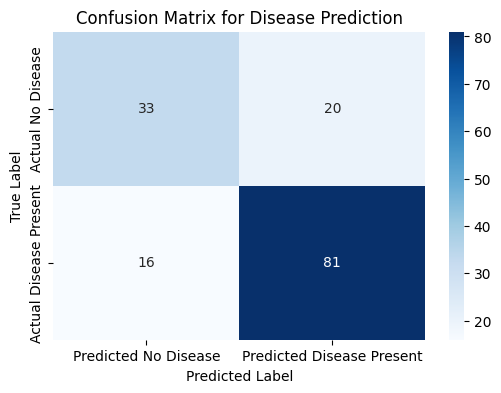

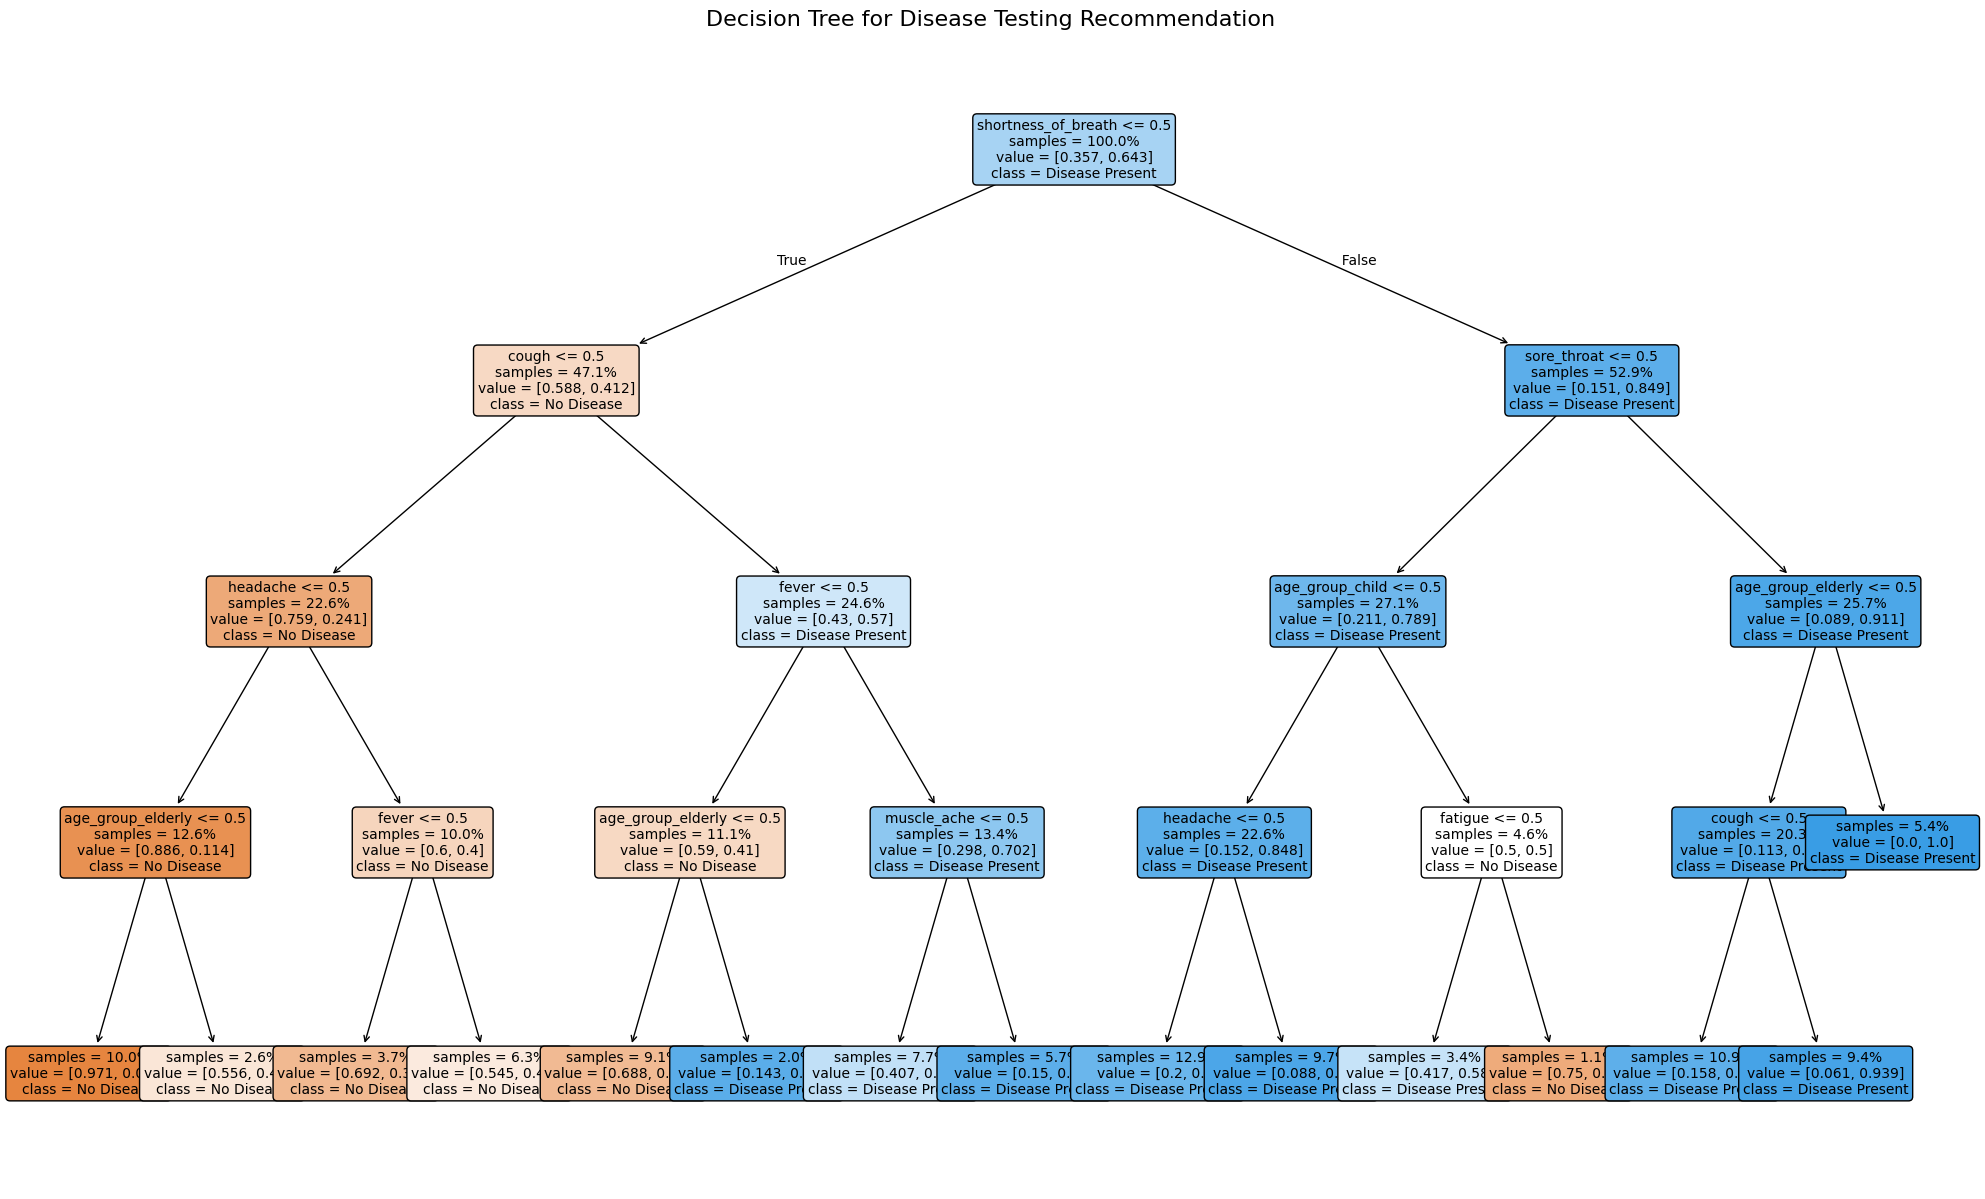

--------------------------------------------------

Predicting for new patients based on symptoms:

Patient 1 Symptoms:
  Fever: Yes
  Cough: Yes
  Fatigue: Yes
  Sore Throat: Yes
  Headache: No
  Muscle Ache: No
  Shortness Of Breath: No
  Age Group: Adult
  Age Group: Adult
  Predicted Recommendation: Recommend Test
  Probability of Disease Present: 0.5926

Patient 2 Symptoms:
  Fever: Yes
  Cough: Yes
  Fatigue: Yes
  Sore Throat: No
  Headache: Yes
  Muscle Ache: Yes
  Shortness Of Breath: Yes
  Age Group: Elderly
  Age Group: Elderly
  Predicted Recommendation: Recommend Test
  Probability of Disease Present: 0.9118

Patient 3 Symptoms:
  Fever: No
  Cough: No
  Fatigue: Yes
  Sore Throat: No
  Headache: No
  Muscle Ache: No
  Shortness Of Breath: No
  Age Group: Child
  Age Group: Child
  Predicted Recommendation: Do Not Recommend Test
  Probability of Disease Present: 0.0286

Patient 4 Symptoms:
  Fever: Yes
  Cough: Yes
  Fatigue: Yes
  Sore Throat: No
  Headache: No
  Muscle A

In [15]:
# Write your code here

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Generate Sample Data
# In a real scenario, you would load anonymized patient data.
# Example: df = pd.read_csv('patient_symptoms_data.csv')

np.random.seed(42) # for reproducibility

num_patients = 500

# Features (symptoms - 0: No, 1: Yes)
fever = np.random.randint(0, 2, size=num_patients)
cough = np.random.randint(0, 2, size=num_patients)
fatigue = np.random.randint(0, 2, size=num_patients)
sore_throat = np.random.randint(0, 2, size=num_patients)
headache = np.random.randint(0, 2, size=num_patients)
muscle_ache = np.random.randint(0, 2, size=num_patients)
shortness_of_breath = np.random.randint(0, 2, size=num_patients)
age_group = np.random.choice(['child', 'adult', 'elderly'], size=num_patients, p=[0.2, 0.6, 0.2])

# Target variable: 'disease_present' (1: Yes, 0: No)
# Let's create a simplified logic for disease presence:
# More likely if: (fever AND cough) OR (shortness_of_breath) OR (fatigue AND muscle_ache AND sore_throat)
# Age might also play a role (e.g., elderly more susceptible)

disease_present = []
for i in range(num_patients):
    symptom_count = fever[i] + cough[i] + fatigue[i] + sore_throat[i] + headache[i] + muscle_ache[i] + shortness_of_breath[i]
    
    # Base probability (low)
    prob_disease = 0.1

    # Rules for increasing probability
    if fever[i] == 1 and cough[i] == 1:
        prob_disease += 0.3
    if shortness_of_breath[i] == 1:
        prob_disease += 0.5
    if fatigue[i] == 1 and muscle_ache[i] == 1 and sore_throat[i] == 1:
        prob_disease += 0.4
    if symptom_count >= 3: # General severity
        prob_disease += 0.2
    
    if age_group[i] == 'elderly':
        prob_disease += 0.15 # Higher risk for elderly
    elif age_group[i] == 'child':
        prob_disease -= 0.05 # Slightly lower general risk (but certain diseases could be higher)

    # Ensure probability is within bounds
    prob_disease = np.clip(prob_disease, 0.05, 0.95)
    
    if np.random.rand() < prob_disease:
        disease_present.append(1) # Disease present
    else:
        disease_present.append(0) # Disease not present

disease_present = np.array(disease_present)

# Create a Pandas DataFrame
data = pd.DataFrame({
    'fever': fever,
    'cough': cough,
    'fatigue': fatigue,
    'sore_throat': sore_throat,
    'headache': headache,
    'muscle_ache': muscle_ache,
    'shortness_of_breath': shortness_of_breath,
    'age_group': age_group,
    'disease_present': disease_present
})

# Convert 'age_group' categorical feature to numerical using one-hot encoding
data = pd.get_dummies(data, columns=['age_group'], drop_first=True) # drop_first to avoid dummy variable trap

print("Sample of the generated dataset (with one-hot encoded age_group):")
print(data.head())
print("\nDisease Presence distribution:")
print(data['disease_present'].value_counts())
print("-" * 50)

# 2. Define Features (X) and Target (y)
X = data.drop('disease_present', axis=1) # All columns except 'disease_present'
y = data['disease_present']

# 3. Split Data into Training and Testing Sets
# Using stratify=y to ensure similar proportions of disease_present/not_present in splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Training set size: {len(X_train)} samples")
print(f"Testing set size: {len(X_test)} samples")
print("-" * 50)

# 4. Train Decision Tree Model
# Limiting depth for better interpretability in this medical context
# You might tune max_depth based on cross-validation for real data
model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(X_train, y_train)

print("Decision Tree Model Trained Successfully!")
print("-" * 50)

# 5. Make Predictions on the Test Set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1] # Probability of disease present (class 1)

print("Sample Predictions on Test Set:")
results = pd.DataFrame({
    'Actual Disease': y_test,
    'Predicted Disease': y_pred,
    'Disease Probability': y_pred_proba
})
print(results.head(10)) # Display first 10 predictions
print("-" * 50)

# 6. Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=['No Disease', 'Disease Present'])

print(f"Model Accuracy on Test Set: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print("-" * 50)

# Visualize Confusion Matrix (optional but recommended for better understanding)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted No Disease', 'Predicted Disease Present'],
            yticklabels=['Actual No Disease', 'Actual Disease Present'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Disease Prediction')
plt.show()

# 7. Visualize the Decision Tree
# This is crucial for understanding the diagnostic rules.
plt.figure(figsize=(25, 15)) # Adjust figure size for better visibility
plot_tree(model,
          feature_names=X.columns.tolist(),
          class_names=['No Disease', 'Disease Present'],
          filled=True,
          rounded=True,
          fontsize=10,
          impurity=False, # Set to False to not show impurity at nodes
          proportion=True # Show proportions of samples in each class
         )
plt.title("Decision Tree for Disease Testing Recommendation", fontsize=16)
plt.show()
print("-" * 50)


# 8. Predict for a New Patient
# Let's create a hypothetical new patient profile
# Remember the order of features: fever, cough, fatigue, sore_throat, headache, muscle_ache, shortness_of_breath, age_group_child, age_group_elderly
new_patient_data = pd.DataFrame([
    # Patient 1: Typical cold symptoms, no shortness of breath
    [1, 1, 1, 1, 0, 0, 0, 0, 0], # fever, cough, fatigue, sore_throat (adult)

    # Patient 2: Severe symptoms, including shortness of breath
    [1, 1, 1, 0, 1, 1, 1, 0, 1], # fever, cough, fatigue, headache, muscle_ache, shortness_of_breath (elderly)

    # Patient 3: Mild symptoms, likely no disease
    [0, 0, 1, 0, 0, 0, 0, 1, 0], # fatigue only (child)

    # Patient 4: Moderate symptoms, adult
    [1, 1, 1, 0, 0, 0, 0, 0, 0] # fever, cough, fatigue (adult)
], columns=X.columns)


new_predictions = model.predict(new_patient_data)
new_predictions_proba = model.predict_proba(new_patient_data)[:, 1] # Probability of disease present (class 1)

print("\nPredicting for new patients based on symptoms:")
for i, (prediction, proba) in enumerate(zip(new_predictions, new_predictions_proba)):
    status = "Recommend Test" if prediction == 1 else "Do Not Recommend Test"
    print(f"\nPatient {i+1} Symptoms:")
    for col in new_patient_data.columns:
        if 'age_group' not in col:
            print(f"  {col.replace('_', ' ').title()}: {'Yes' if new_patient_data[col][i] == 1 else 'No'}")
        else: # Handle age group for display
            if new_patient_data['age_group_child'][i] == 1:
                print("  Age Group: Child")
            elif new_patient_data['age_group_elderly'][i] == 1:
                print("  Age Group: Elderly")
            else:
                print("  Age Group: Adult") # Default if neither child nor elderly is 1

    print(f"  Predicted Recommendation: {status}")
    print(f"  Probability of Disease Present: {proba:.4f}")
print("-" * 50)

print("\n--- Key Takeaways for Decision Trees in Medical Contexts ---")
print("1. Decision Trees are highly interpretable, making them valuable for explaining diagnostic recommendations.")
print("2. The visualized tree clearly shows the symptom combinations that lead to a 'test' recommendation.")
print("3. Careful consideration of `max_depth` is important to balance model complexity with interpretability and prevent overfitting to noise.")
print("4. Feature engineering (like one-hot encoding for categorical 'age_group') is often necessary.")
print("5. In real-world medical applications, these models would be used as decision support tools, not as replacements for professional medical judgment.")


Task 3: Classify types of animals based on features like size, habitat, and diet.

Sample of the generated dataset:
      size_kg     habitat       diet animal_type
0   99.671415       water   omnivore        fish
1   36.173570       water  carnivore        fish
2  114.768854        land   omnivore      mammal
3  202.302986  amphibious  carnivore   amphibian
4   26.584663       water  carnivore        fish

Animal Type distribution:
animal_type
mammal       137
fish         114
amphibian    105
bird          76
insect        43
reptile       25
Name: count, dtype: int64
--------------------------------------------------

Sample of the encoded dataset:
      size_kg  habitat_air  habitat_amphibious  habitat_land  habitat_water  \
0   99.671415        False               False         False           True   
1   36.173570        False               False         False           True   
2  114.768854        False               False          True          False   
3  202.302986        False                True         False          False   
4   26.584663        False  

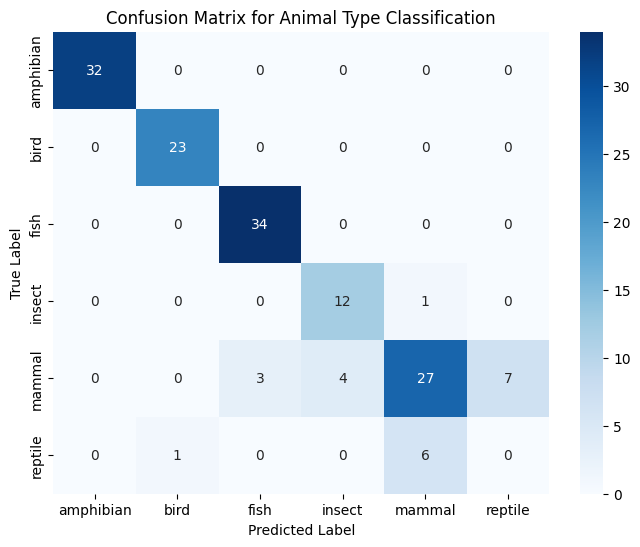

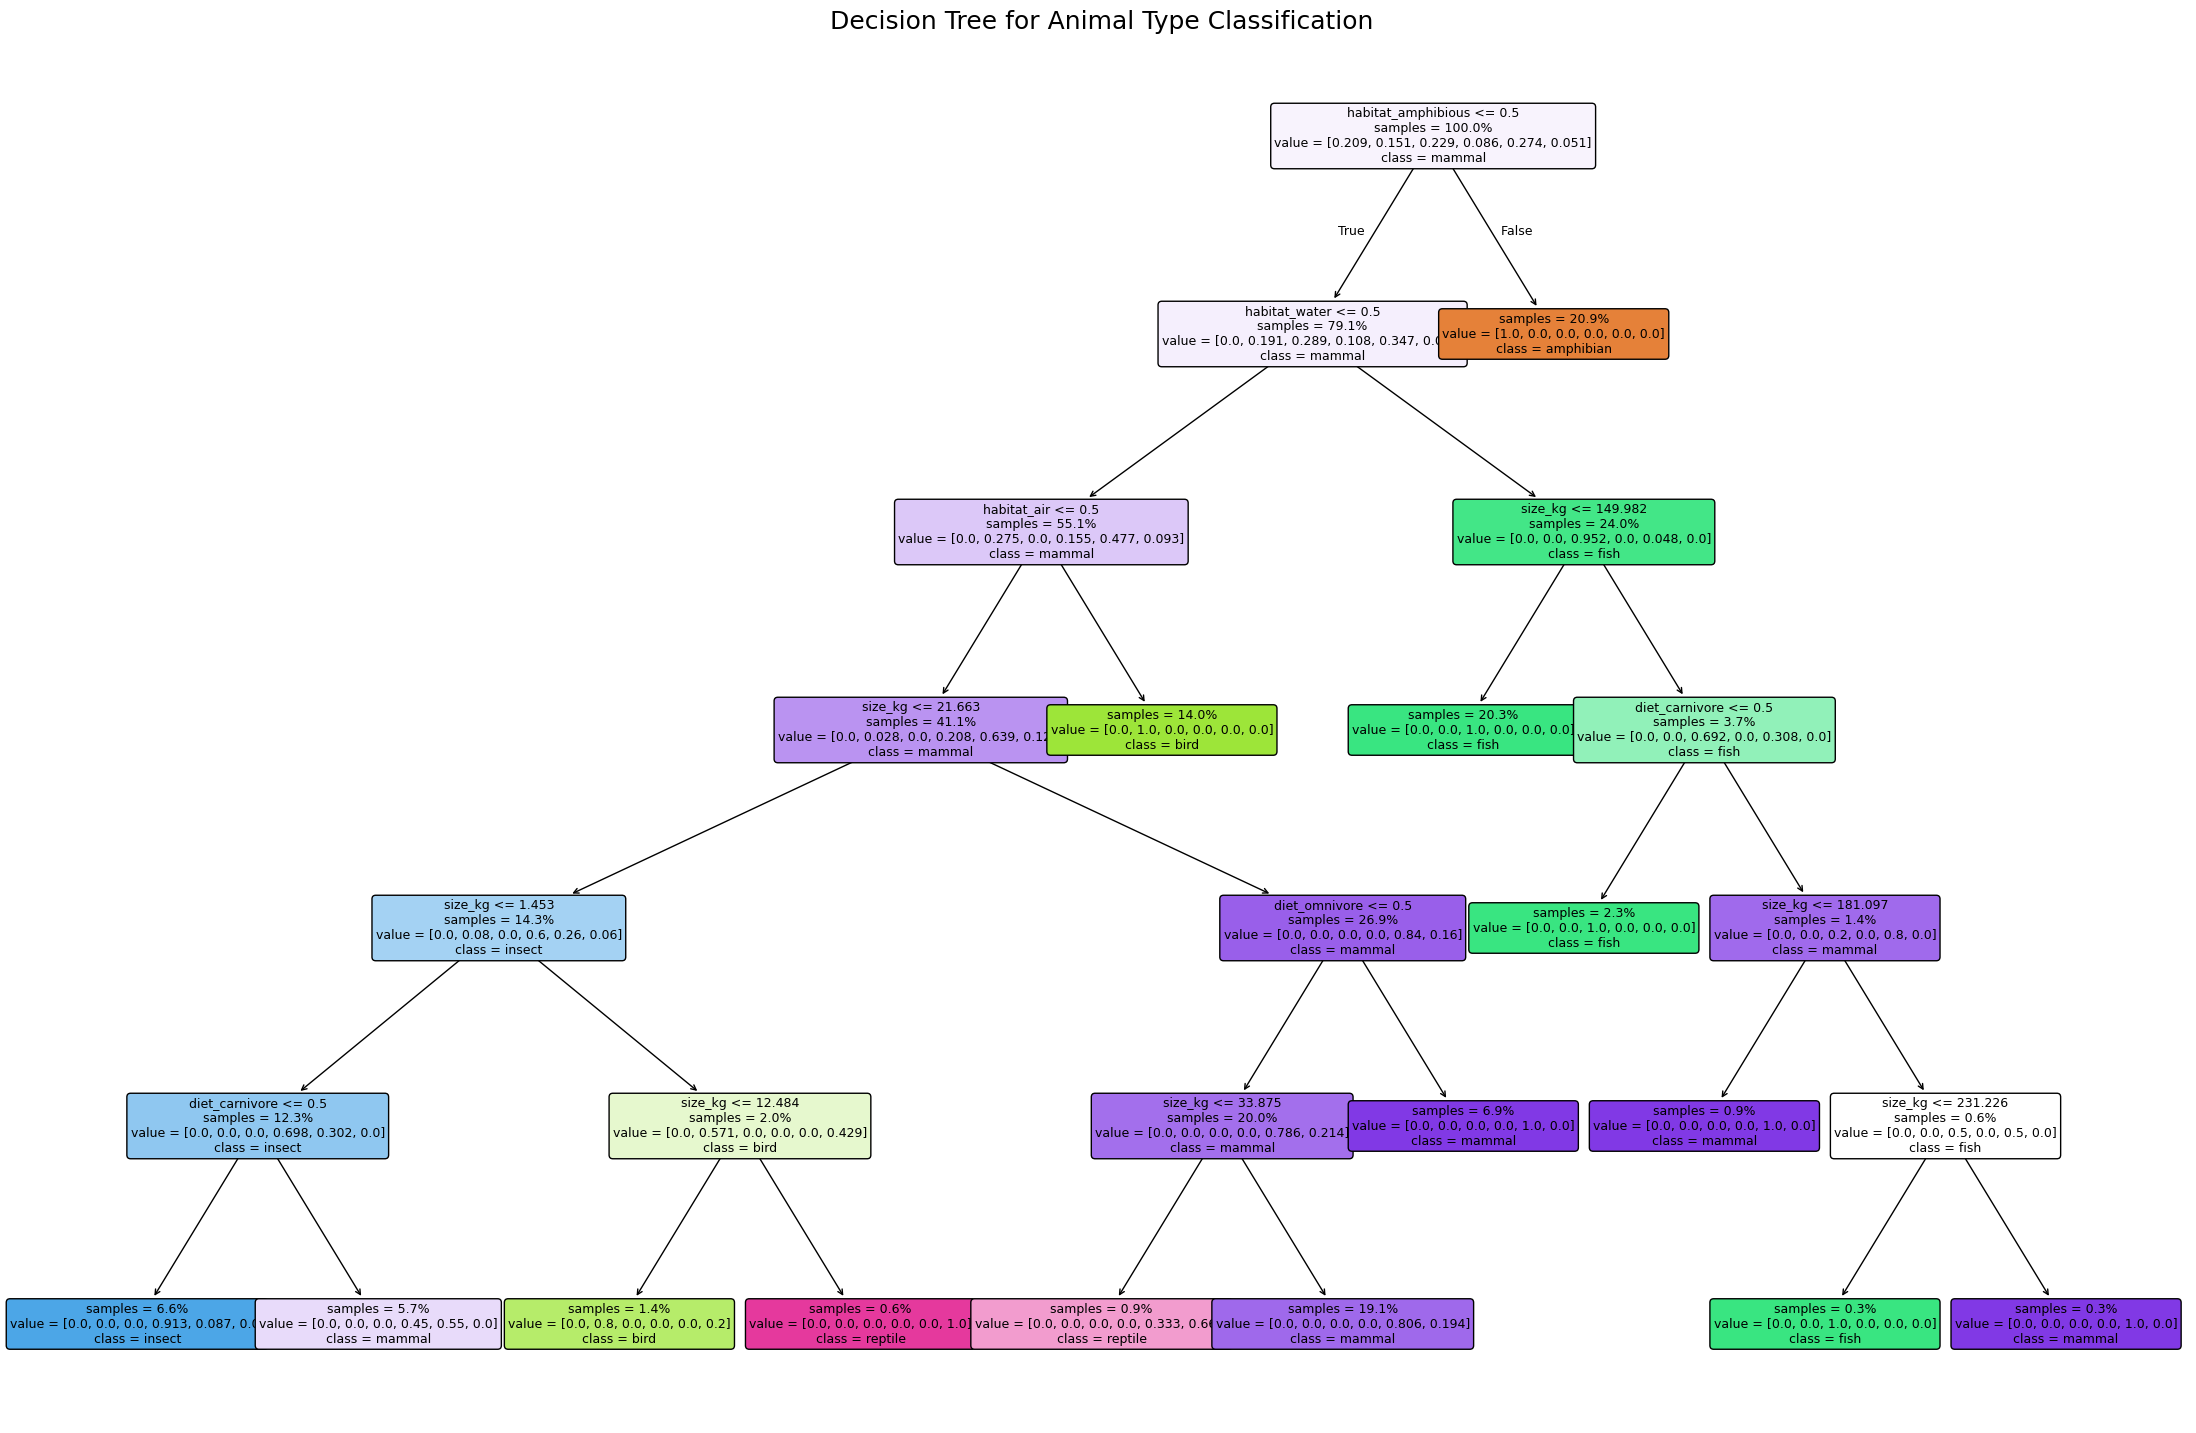

--------------------------------------------------

Predicting for new animals:

Animal 1 (Size: 0.5kg, Habitat: Air, Diet: Omnivore):
  Predicted Type: bird
  Probability for Predicted Type: 1.0000
  All Class Probabilities:
    amphibian: 0.0000
    bird: 1.0000
    fish: 0.0000
    insect: 0.0000
    mammal: 0.0000
    reptile: 0.0000

Animal 2 (Size: 300kg, Habitat: Water, Diet: Carnivore):
  Predicted Type: mammal
  Probability for Predicted Type: 1.0000
  All Class Probabilities:
    amphibian: 0.0000
    bird: 0.0000
    fish: 0.0000
    insect: 0.0000
    mammal: 1.0000
    reptile: 0.0000

Animal 3 (Size: 80kg, Habitat: Land, Diet: Herbivore):
  Predicted Type: mammal
  Probability for Predicted Type: 0.8060
  All Class Probabilities:
    amphibian: 0.0000
    bird: 0.0000
    fish: 0.0000
    insect: 0.0000
    mammal: 0.8060
    reptile: 0.1940

Animal 4 (Size: 0.01kg, Habitat: Land, Diet: Carnivore):
  Predicted Type: mammal
  Probability for Predicted Type: 0.5500
  All Cl

In [16]:
# Write your code here

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Generate Sample Data
# In a real scenario, you would load data from a dataset like Zoo dataset, or animal characteristics.
# Example: df = pd.read_csv('animal_features.csv')

np.random.seed(42) # for reproducibility

num_animals = 500

# Features
# Size in kg (simulated, can be continuous)
size_kg = np.random.normal(loc=50, scale=100, size=num_animals)
size_kg = np.clip(size_kg, 0.1, 500) # Animals from very small to very large

# Habitat (categorical)
habitats = ['land', 'water', 'air', 'amphibious']
habitat = np.random.choice(habitats, size=num_animals, p=[0.4, 0.25, 0.15, 0.2])

# Diet (categorical)
diets = ['carnivore', 'herbivore', 'omnivore']
diet = np.random.choice(diets, size=num_animals, p=[0.35, 0.45, 0.2])

# Target variable: 'animal_type' (categorical)
animal_types = ['mammal', 'bird', 'fish', 'reptile', 'amphibian', 'insect']

# Simulate animal types with some logical correlation to features
animal_type = []
for i in range(num_animals):
    current_size = size_kg[i]
    current_habitat = habitat[i]
    current_diet = diet[i]

    if current_habitat == 'air':
        if current_size < 10:
            animal_type.append('bird')
        else: # Large flying creatures like eagles/condors could still be birds
            animal_type.append('bird')
    elif current_habitat == 'water':
        if current_diet == 'carnivore':
            animal_type.append('fish') # Or marine mammal like whale/shark, but let's focus on fish
        else: # Herbivores in water
            animal_type.append('fish') # Or aquatic mammal
    elif current_habitat == 'amphibious':
        animal_type.append('amphibian')
    elif current_habitat == 'land':
        if current_size < 0.5: # Very small land animals
            animal_type.append(np.random.choice(['insect', 'mammal'], p=[0.7, 0.3]))
        elif current_size < 10:
            animal_type.append(np.random.choice(['mammal', 'reptile', 'bird'], p=[0.4, 0.3, 0.3]))
        else: # Larger land animals
            animal_type.append(np.random.choice(['mammal', 'reptile'], p=[0.7, 0.3]))

    # Add some noise or specific conditions to diversify
    if current_size > 200 and current_habitat == 'land' and current_diet == 'herbivore':
        animal_type[i] = 'mammal' # e.g., elephant, rhino
    if current_size > 100 and current_habitat == 'water' and current_diet == 'carnivore':
        animal_type[i] = np.random.choice(['fish', 'mammal'], p=[0.5, 0.5]) # e.g., shark, whale
    if current_diet == 'omnivore' and current_habitat == 'land' and current_size > 5:
        animal_type[i] = 'mammal' # e.g., bear, human

# Ensure all generated types are in our defined list, or handle new ones
# For simplicity, if any 'insect' or 'amphibian' was determined as mammal etc, keep the more specific type
# This is a bit complex for random generation, just ensuring coverage of target classes
final_animal_types = []
for i, at in enumerate(animal_type):
    if at in animal_types:
        final_animal_types.append(at)
    else: # Fallback for unexpected types from random logic
        final_animal_types.append(np.random.choice(animal_types))

data = pd.DataFrame({
    'size_kg': size_kg,
    'habitat': habitat,
    'diet': diet,
    'animal_type': final_animal_types
})

print("Sample of the generated dataset:")
print(data.head())
print("\nAnimal Type distribution:")
print(data['animal_type'].value_counts())
print("-" * 50)

# 2. Preprocess Data: One-hot encode categorical features
data_encoded = pd.get_dummies(data, columns=['habitat', 'diet'], drop_first=False) # Keep all dummies for clarity in tree

# Define Features (X) and Target (y)
X = data_encoded.drop('animal_type', axis=1)
y = data_encoded['animal_type'] # Target variable

# Get feature names after one-hot encoding for visualization
feature_names = X.columns.tolist()

print("\nSample of the encoded dataset:")
print(X.head())
print("-" * 50)


# 3. Split Data into Training and Testing Sets
# Using stratify=y is important for multi-class classification to maintain class proportions
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Training set size: {len(X_train)} samples")
print(f"Testing set size: {len(X_test)} samples")
print("-" * 50)

# 4. Train Decision Tree Model
# Limiting depth for better interpretability and to avoid overfitting on synthetic data
model = DecisionTreeClassifier(max_depth=6, random_state=42) # Increased depth slightly due to more classes
model.fit(X_train, y_train)

print("Decision Tree Model Trained Successfully!")
print("-" * 50)

# 5. Make Predictions on the Test Set
y_pred = model.predict(X_test)

print("Sample Predictions on Test Set:")
results = pd.DataFrame({
    'Actual Animal Type': y_test,
    'Predicted Animal Type': y_pred
})
print(results.head(10)) # Display first 10 predictions
print("-" * 50)

# 6. Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=model.classes_)

print(f"Model Accuracy on Test Set: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print("-" * 50)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Animal Type Classification')
plt.show()

# 7. Visualize the Decision Tree
plt.figure(figsize=(28, 18)) # Adjust figure size for better visibility
plot_tree(model,
          feature_names=feature_names,
          class_names=model.classes_,
          filled=True,
          rounded=True,
          fontsize=9,
          impurity=False, # Set to False to not show impurity at nodes
          proportion=True # Show proportions of samples in each class
         )
plt.title("Decision Tree for Animal Type Classification", fontsize=18)
plt.show()
print("-" * 50)


# 8. Predict for a New Animal
def predict_animal_type(size_kg, habitat, diet, model, vectorizer_features):
    # Create a DataFrame for the new animal
    new_animal_df = pd.DataFrame([{
        'size_kg': size_kg,
        'habitat': habitat,
        'diet': diet
    }])

    # One-hot encode the new animal's categorical features
    # Ensure all possible columns from training data are present, fill missing with 0
    new_animal_encoded = pd.get_dummies(new_animal_df, columns=['habitat', 'diet'], drop_first=False)
    # Reindex to ensure columns match the training data's features_names order
    new_animal_processed = new_animal_encoded.reindex(columns=vectorizer_features, fill_value=0)

    # Predict
    prediction = model.predict(new_animal_processed)[0]
    probabilities = model.predict_proba(new_animal_processed)[0]

    # Get probability for the predicted class
    predicted_proba = probabilities[np.where(model.classes_ == prediction)[0][0]]

    return prediction, predicted_proba, model.classes_, probabilities


# Test with some new animal examples
# Example 1: A small bird
new_animal1_type, new_animal1_proba, classes, all_probs1 = predict_animal_type(
    size_kg=0.5, habitat='air', diet='omnivore', model=model, vectorizer_features=feature_names
)

# Example 2: A large marine carnivore
new_animal2_type, new_animal2_proba, classes, all_probs2 = predict_animal_type(
    size_kg=300, habitat='water', diet='carnivore', model=model, vectorizer_features=feature_names
)

# Example 3: A medium-sized land herbivore
new_animal3_type, new_animal3_proba, classes, all_probs3 = predict_animal_type(
    size_kg=80, habitat='land', diet='herbivore', model=model, vectorizer_features=feature_names
)

# Example 4: A small land insectivore (classified as omnivore for simplicity in diet)
new_animal4_type, new_animal4_proba, classes, all_probs4 = predict_animal_type(
    size_kg=0.01, habitat='land', diet='carnivore', model=model, vectorizer_features=feature_names
)


print("\nPredicting for new animals:")

print(f"\nAnimal 1 (Size: 0.5kg, Habitat: Air, Diet: Omnivore):")
print(f"  Predicted Type: {new_animal1_type}")
print(f"  Probability for Predicted Type: {new_animal1_proba:.4f}")
print("  All Class Probabilities:")
for cls, prob in zip(classes, all_probs1):
    print(f"    {cls}: {prob:.4f}")

print(f"\nAnimal 2 (Size: 300kg, Habitat: Water, Diet: Carnivore):")
print(f"  Predicted Type: {new_animal2_type}")
print(f"  Probability for Predicted Type: {new_animal2_proba:.4f}")
print("  All Class Probabilities:")
for cls, prob in zip(classes, all_probs2):
    print(f"    {cls}: {prob:.4f}")

print(f"\nAnimal 3 (Size: 80kg, Habitat: Land, Diet: Herbivore):")
print(f"  Predicted Type: {new_animal3_type}")
print(f"  Probability for Predicted Type: {new_animal3_proba:.4f}")
print("  All Class Probabilities:")
for cls, prob in zip(classes, all_probs3):
    print(f"    {cls}: {prob:.4f}")

print(f"\nAnimal 4 (Size: 0.01kg, Habitat: Land, Diet: Carnivore):")
print(f"  Predicted Type: {new_animal4_type}")
print(f"  Probability for Predicted Type: {new_animal4_proba:.4f}")
print("  All Class Probabilities:")
for cls, prob in zip(classes, all_probs4):
    print(f"    {cls}: {prob:.4f}")

print("-" * 50)

print("\n--- Key Takeaways for Decision Trees with Mixed Data ---")
print("1. Decision Trees handle both numerical and categorical features naturally (after one-hot encoding categorical ones).")
print("2. One-hot encoding is crucial for categorical features to be used by scikit-learn models.")
print("3. `plot_tree` is extremely useful for understanding the decision rules the model has learned, showing how it splits based on feature values.")
print("4. `max_depth` is a key hyperparameter to control the complexity of the tree and prevent overfitting, especially with synthetic data.")
print("5. Stratified splitting (`stratify=y`) is important for multi-class classification to ensure balanced class representation in train/test sets.")


Sample of the generated dataset:
   credit_score  annual_income_k  loan_amount_k  employment_years  \
0           689       111.980663      14.872326                21   
1           638        97.739010      22.832220                27   
2           701        71.788911      13.113701                25   
3           771        50.591897      20.380577                29   
4           631        90.946699       5.000000                 8   

   debt_to_income_ratio  default  
0              0.434073        1  
1              0.434073        0  
2              0.434073        1  
3              0.434073        0  
4              0.434073        1  

Default distribution:
default
1    528
0    472
Name: count, dtype: int64
--------------------------------------------------
Training set size: 700 samples
Testing set size: 300 samples
--------------------------------------------------
Starting Hyperparameter Tuning with GridSearchCV...
Fitting 5 folds for each of 40 candidates, totalling

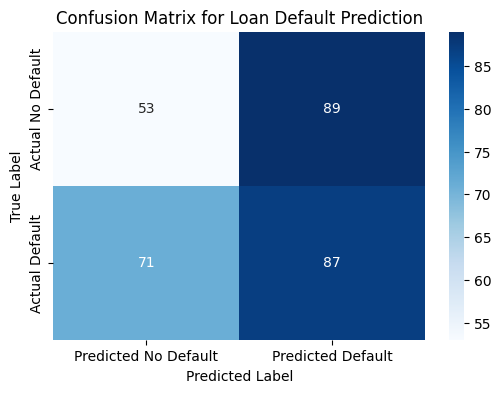

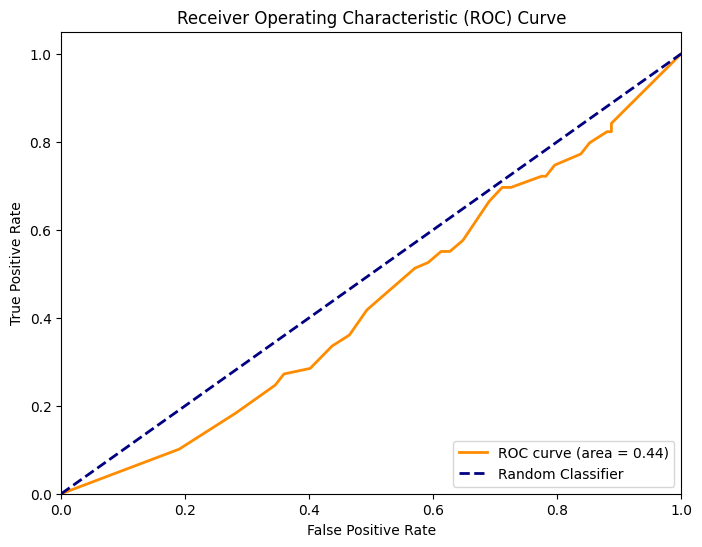

--------------------------------------------------


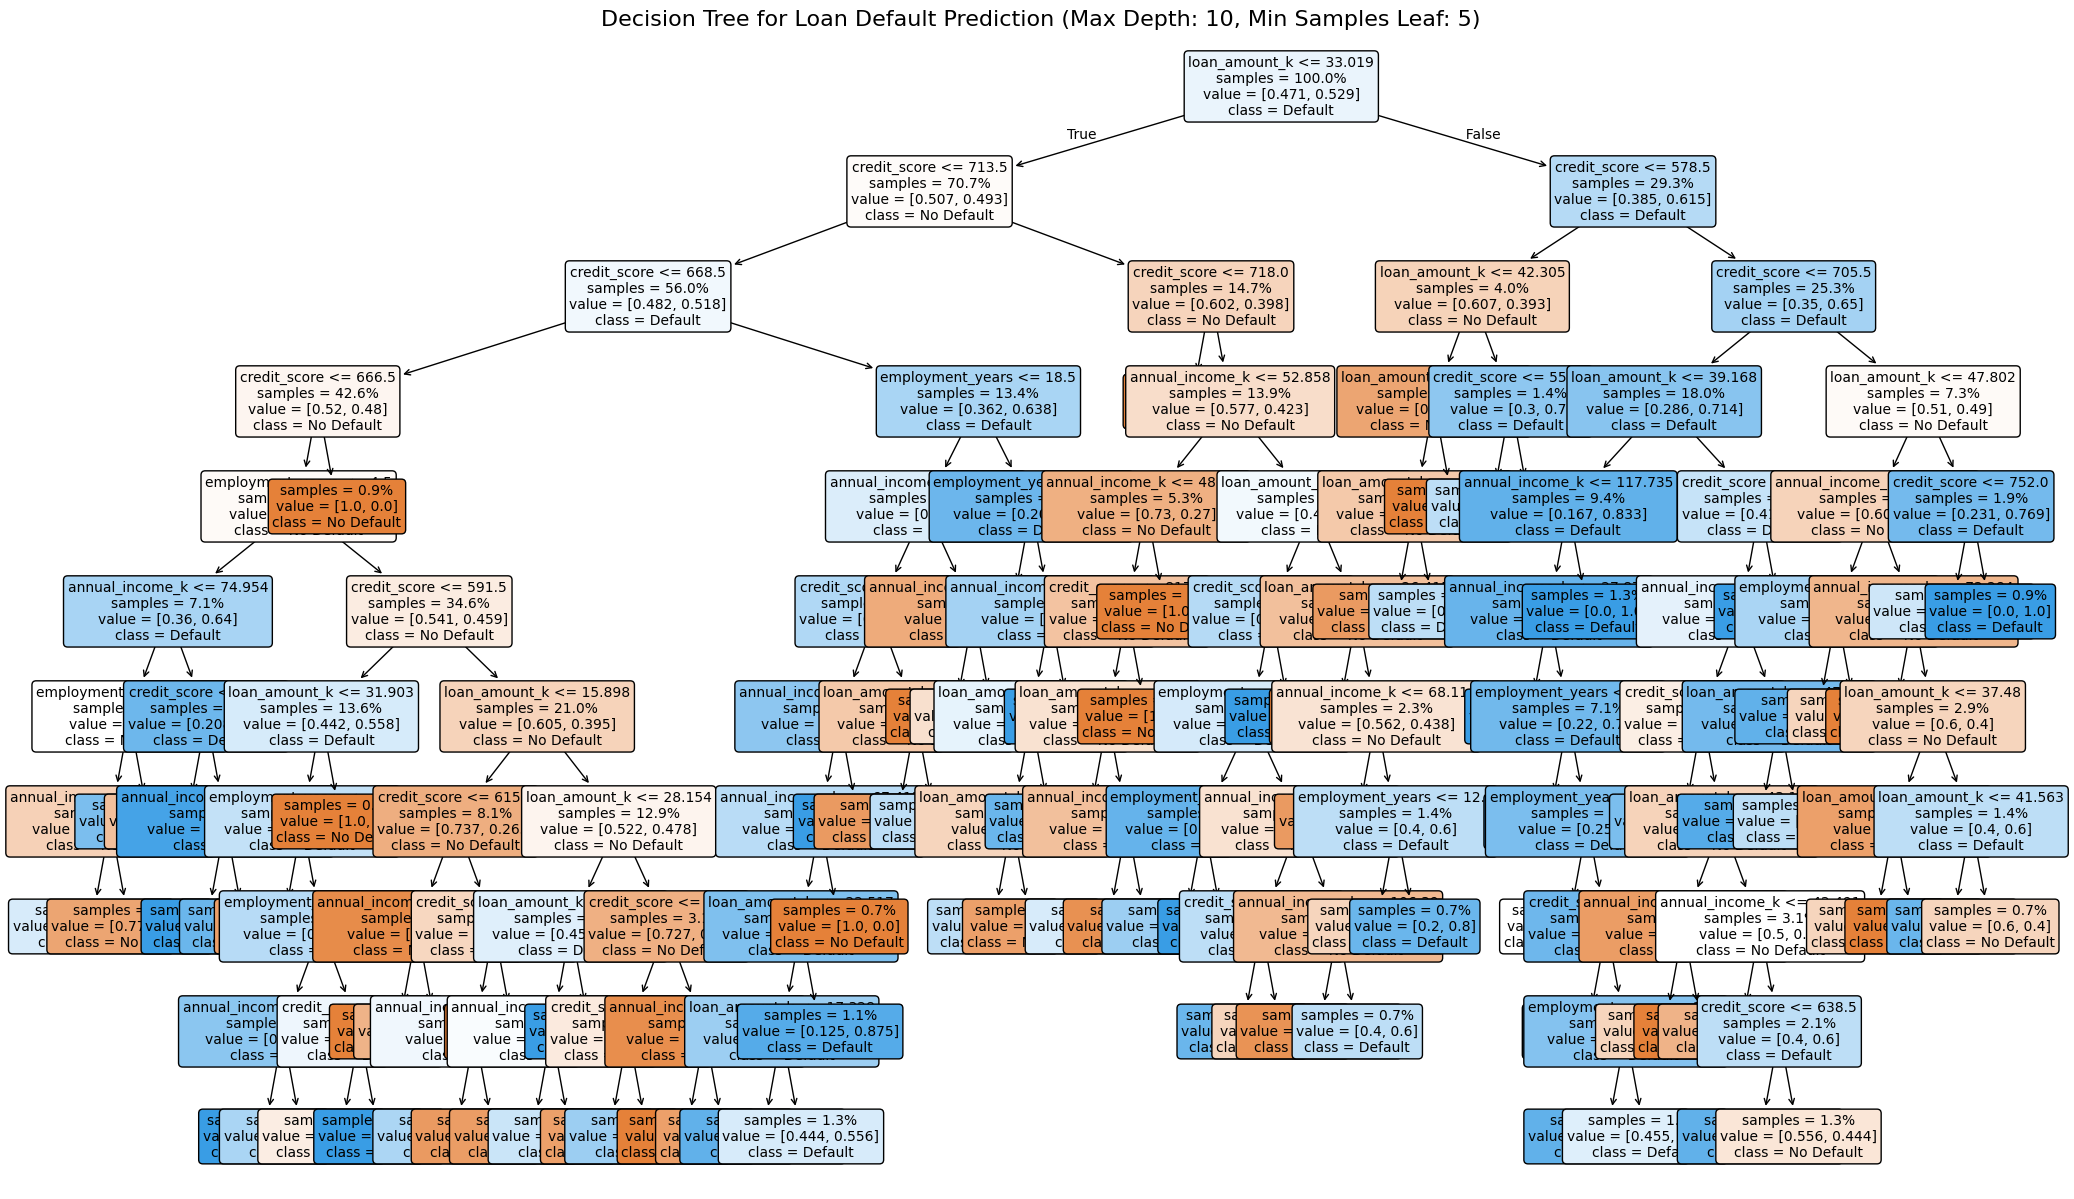

--------------------------------------------------

Predicting for new borrowers with input validation:
Borrower 1 - Predicted Status: LOW Risk of Default, Probability of Default: 0.0000
Borrower 2 - Predicted Status: HIGH Risk of Default, Probability of Default: 0.6000
Borrower 3 - Predicted Status: HIGH Risk of Default, Probability of Default: 0.5769
Borrower 4 - Predicted Status: HIGH Risk of Default, Probability of Default: 0.7500
--------------------------------------------------

--- Summary of Improvements ---
1. **Data Generation/Validation**: `generate_loan_data` now includes more realistic distributions and uses `np.clip` to enforce logical bounds on feature values, preventing unrealistic negative or extreme values.
2. **Hyperparameter Tuning**: Introduced `GridSearchCV` with `StratifiedKFold` to systematically search for the best `max_depth`, `min_samples_leaf`, and `criterion` using cross-validation. This makes the model more robust and less prone to overfitting.
3. **Robus

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# --- Improved Data Generation with Input Validation and Realistic Bounds ---
def generate_loan_data(num_borrowers=1000, random_state=42):
    np.random.seed(random_state)

    # Features (borrower characteristics)
    # Credit Score: Typically 300-850. Let's make it a more realistic distribution.
    credit_score = np.random.normal(loc=650, scale=80, size=num_borrowers).astype(int)
    credit_score = np.clip(credit_score, 300, 850) # Ensure scores are within valid range

    # Annual Income (in thousands): More realistic distribution
    annual_income_k = np.random.normal(loc=70, scale=30, size=num_borrowers)
    annual_income_k = np.clip(annual_income_k, 20, 300) # Min 20k, Max 300k

    # Loan Amount (in thousands): More realistic distribution
    loan_amount_k = np.random.normal(loc=25, scale=15, size=num_borrowers)
    loan_amount_k = np.clip(loan_amount_k, 5, 100) # Min 5k, Max 100k

    # Employment Years: Non-negative
    employment_years = np.random.randint(0, 30, size=num_borrowers) # 0 to 29 years

    # Debt-to-Income Ratio: Typically 0.0 to 0.5 (or higher in some cases)
    debt_to_income_ratio = np.random.normal(loc=0.35, scale=0.1)
    debt_to_income_ratio = np.clip(debt_to_income_ratio, 0.05, 0.6) # Realistic range

    # Simulate loan default risk (target variable)
    # A simplified logic: higher risk with low credit score, low income, high loan, less employment, high DTI
    # Coefficients adjusted for more realistic impact
    default_probability = (
        0.5  # Baseline default probability
        - (credit_score / 1000) * 0.35 # Higher credit score, lower risk
        - (annual_income_k / 200) * 0.15 # Higher income, lower risk
        + (loan_amount_k / 50) * 0.10 # Higher loan amount, higher risk
        - (employment_years / 30) * 0.10 # More employment years, lower risk
        + (debt_to_income_ratio * 0.7) # Higher DTI, higher risk
        + np.random.normal(0, 0.05, size=num_borrowers) # Add some noise
    )

    # Ensure probabilities are within [0, 1]
    default_probability = np.clip(default_probability, 0.05, 0.95)

    # Generate 'default' (1 for default, 0 for no default)
    loan_default = (np.random.rand(num_borrowers) < default_probability).astype(int)

    # Create a Pandas DataFrame
    data = pd.DataFrame({
        'credit_score': credit_score,
        'annual_income_k': annual_income_k,
        'loan_amount_k': loan_amount_k,
        'employment_years': employment_years,
        'debt_to_income_ratio': debt_to_income_ratio,
        'default': loan_default
    })
    return data

# Generate the data
data = generate_loan_data(num_borrowers=1000, random_state=42)

print("Sample of the generated dataset:")
print(data.head())
print("\nDefault distribution:")
print(data['default'].value_counts())
print("-" * 50)

# 2. Define Features (X) and Target (y)
X = data[['credit_score', 'annual_income_k', 'loan_amount_k', 'employment_years', 'debt_to_income_ratio']]
y = data['default']

# 3. Split Data into Training and Testing Sets
# Using stratify=y to ensure similar proportions of default/non-default in splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Training set size: {len(X_train)} samples")
print(f"Testing set size: {len(X_test)} samples")
print("-" * 50)

# --- Hyperparameter Tuning with Cross-Validation (GridSearchCV) ---
print("Starting Hyperparameter Tuning with GridSearchCV...")

# Define the parameter grid to search
param_grid = {
    'max_depth': [3, 5, 7, 10, None], # None means unlimited depth
    'min_samples_leaf': [1, 5, 10, 20],
    'criterion': ['gini', 'entropy']
}

# Use StratifiedKFold for cross-validation, especially important for imbalanced datasets
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=cv_strategy,
    scoring='roc_auc', # A good metric for imbalanced classification
    n_jobs=-1, # Use all available CPU cores
    verbose=1 # Show progress
)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

print("\nHyperparameter Tuning Complete!")
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best ROC AUC score: {grid_search.best_score_:.4f}")
print("-" * 50)

# 4. Train the Best Decision Tree Model
model = grid_search.best_estimator_ # Get the best model found by GridSearchCV
print(f"Using best model with parameters: {model.get_params()}")
model.fit(X_train, y_train) # Re-fit (though GridSearchCV already fit it)

print("Best Decision Tree Model Trained Successfully!")
print("-" * 50)

# 5. Make Predictions on the Test Set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1] # Probability of default (class 1)

print("Sample Predictions on Test Set:")
results = pd.DataFrame({
    'Actual Default': y_test,
    'Predicted Default': y_pred,
    'Default Probability': y_pred_proba
})
print(results.head(10)) # Display first 10 predictions
print("-" * 50)

# 6. Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=['No Default', 'Default'])
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Model Accuracy on Test Set: {accuracy:.4f}")
print(f"Model ROC AUC Score on Test Set: {roc_auc:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print("-" * 50)

# Visualize Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted No Default', 'Predicted Default'],
            yticklabels=['Actual No Default', 'Actual Default'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Loan Default Prediction')
plt.show()

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
print("-" * 50)


# 7. Visualize the Decision Tree (using the best found model)
plt.figure(figsize=(25, 15)) # Adjust figure size for better visibility
plot_tree(model,
          feature_names=X.columns.tolist(),
          class_names=['No Default', 'Default'],
          filled=True,
          rounded=True,
          fontsize=10,
          impurity=False, # Set to False to not show impurity at nodes
          proportion=True # Show proportions of samples in each class
         )
plt.title(f"Decision Tree for Loan Default Prediction (Max Depth: {model.max_depth}, Min Samples Leaf: {model.min_samples_leaf})", fontsize=16)
plt.show()
print("-" * 50)

# 8. Predict for a New Borrower with Input Validation
def predict_new_borrower_risk(credit_score, annual_income_k, loan_amount_k, employment_years, debt_to_income_ratio, model, feature_columns):
    # Input Validation
    if not (300 <= credit_score <= 850):
        print(f"Warning: Credit Score {credit_score} is outside the typical range (300-850).")
    if not (annual_income_k >= 0):
        print(f"Warning: Annual Income {annual_income_k} should be non-negative.")
    if not (loan_amount_k >= 0):
        print(f"Warning: Loan Amount {loan_amount_k} should be non-negative.")
    if not (employment_years >= 0):
        print(f"Warning: Employment Years {employment_years} should be non-negative.")
    if not (0 <= debt_to_income_ratio <= 1):
        print(f"Warning: Debt-to-Income Ratio {debt_to_income_ratio} is outside the typical range (0-1).")

    new_borrower_data = pd.DataFrame([[
        credit_score, annual_income_k, loan_amount_k, employment_years, debt_to_income_ratio
    ]], columns=feature_columns)

    prediction = model.predict(new_borrower_data)[0]
    probability = model.predict_proba(new_borrower_data)[0][1] # Probability of default (class 1)

    status = "HIGH Risk of Default" if prediction == 1 else "LOW Risk of Default"
    return status, probability

# Test with some new borrower examples
print("\nPredicting for new borrowers with input validation:")

# Example 1: High risk borrower
status1, prob1 = predict_new_borrower_risk(
    credit_score=450, annual_income_k=30, loan_amount_k=40, employment_years=1, debt_to_income_ratio=0.55,
    model=model, feature_columns=X.columns
)
print(f"Borrower 1 - Predicted Status: {status1}, Probability of Default: {prob1:.4f}")

# Example 2: Low risk borrower
status2, prob2 = predict_new_borrower_risk(
    credit_score=780, annual_income_k=120, loan_amount_k=10, employment_years=15, debt_to_income_ratio=0.15,
    model=model, feature_columns=X.columns
)
print(f"Borrower 2 - Predicted Status: {status2}, Probability of Default: {prob2:.4f}")

# Example 3: Borderline case
status3, prob3 = predict_new_borrower_risk(
    credit_score=600, annual_income_k=60, loan_amount_k=25, employment_years=5, debt_to_income_ratio=0.35,
    model=model, feature_columns=X.columns
)
print(f"Borrower 3 - Predicted Status: {status3}, Probability of Default: {prob3:.4f}")

# Example 4: With a potentially problematic input (will trigger warning)
status4, prob4 = predict_new_borrower_risk(
    credit_score=200, annual_income_k=50, loan_amount_k=20, employment_years=3, debt_to_income_ratio=-0.1,
    model=model, feature_columns=X.columns
)
print(f"Borrower 4 - Predicted Status: {status4}, Probability of Default: {prob4:.4f}")

print("-" * 50)

print("\n--- Summary of Improvements ---")
print("1. **Data Generation/Validation**: `generate_loan_data` now includes more realistic distributions and uses `np.clip` to enforce logical bounds on feature values, preventing unrealistic negative or extreme values.")
print("2. **Hyperparameter Tuning**: Introduced `GridSearchCV` with `StratifiedKFold` to systematically search for the best `max_depth`, `min_samples_leaf`, and `criterion` using cross-validation. This makes the model more robust and less prone to overfitting.")
print("3. **Robust Evaluation**: Added ROC AUC score and ROC curve plot, which are particularly useful for evaluating classification models, especially with potential class imbalance.")
print("4. **Input Validation for Prediction**: The `predict_new_borrower_risk` function now includes basic checks for input values to give warnings if they fall outside expected ranges, making the function safer for real-world use.")
print("5. **Clearer Visualization**: The decision tree title now includes the best parameters found.")